In [4]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [5]:
tf.random?

In [7]:
tf.random.uniform?


In [12]:
var = tf.random.uniform(shape=[1])

In [1]:
print(var.numpy())

NameError: name 'var' is not defined

In [50]:
def data_creation(w=0.1, b=0.5, n=100):
    X = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(n,), stddev=0.01)
    Y = X*w + b+ noise
    return X.numpy(), Y.numpy()

X, Y = data_creation(n=100)

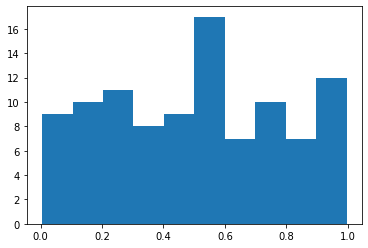

In [51]:
%matplotlib inline
import matplotlib.pyplot as mpl

mpl.hist(X)
mpl.show()

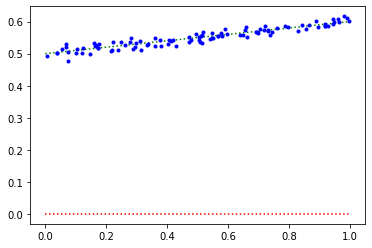

In [52]:
w = 0.1
b = 0.5
w_guess = 0.0
b_guess = 0.0
mpl.plot([0,1],[0*w+b,1*w+b], 'g:' )
mpl.plot([0,1],[0*w_guess+b_guess,1*w_guess+b_guess], 'r:' )
mpl.plot(X, Y, 'b.')

In [57]:
def predict(x, w=w, b=b):
    y = w*x + b
    return y

In [58]:
def mean_squared_error(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))



In [59]:
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.00010721209, shape=(), dtype=float32)


In [60]:
w_guess = 0.1
b_guess = 0.5
print(mean_squared_error(predict(X), Y))

tf.Tensor(0.00010721209, shape=(), dtype=float32)


In [102]:
# w = tf.Variable(0.0)
# b = tf.Variable(-1.0)

learning_rate = 0.001 # Use calc for minimization
steps = 200

for step in range(steps):
  with tf.GradientTape() as tape:
    predictions = predict(X, w=w, b=b)
    loss = mean_squared_error(predictions, Y)
            
  gradients = tape.gradient(loss, [w, b])
  
  w.assign_sub(gradients[0]*learning_rate)
  b.assign_sub(gradients[1]*learning_rate)
    
  if step % 20 == 0:
    print("Step {}".format(step))
    
    

Step 0
Step 20
Step 40
Step 60
Step 80
Step 100
Step 120
Step 140
Step 160
Step 180


In [103]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.102679074>

In [104]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4985267>

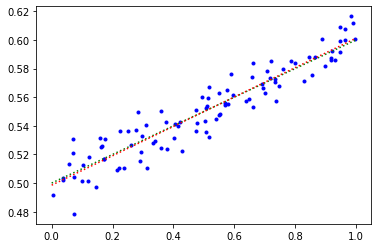

In [105]:
true_w = 0.1
true_b = 0.5

mpl.plot(X, Y, 'b.')

mpl.plot([0,1],[0*true_w+true_b,1*true_w+true_b], 'g:' )
mpl.plot([0,1],[0*w+b,1*w+b], 'r:' )
